# YouTube trending videos

In [17]:
%matplotlib inline
import json
import math
import os
import re
from IPython.display import Image

from images_downloading import ImageSize

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tqdm.notebook import tqdm

from categories import get_categories_dict
from split import split_csv
from tokenizers import Tokenizer, RE_HTTP

## Etap 2 - Atrybuty wizualne


### Wczytanie danych zgrupowanych po id

In [67]:
data_path = "youtube_grouped_by_id_all_list"
gb_videos = pd.read_pickle(os.path.join(data_path, "GB_videos_5p.plk"))
us_videos = pd.read_pickle(os.path.join(data_path, "US_videos_5p.plk"))
videos = pd.concat([gb_videos, us_videos])
videos = videos.rename(columns={"description ":"description"})
videos.head(10)

size = ImageSize.hqdefault.default
images_path = os.path.join("images")
gb_images = pd.read_pickle(os.path.join(images_path, f"GB_{size}.plk"))
us_images = pd.read_pickle(os.path.join(images_path, f"US_{size}.plk"))

videos_images = pd.concat([gb_images, us_images])
videos_images = videos_images.rename(columns={"description ":"description"})
videos_images.head(10)


,number,id,count,thumbnail_path,error,status
0,0,--uXQQ0h-yQ,9,[images\default\0_GB_--uXQQ0h-yQ_0.jpg],[False],[200]
0,1,-3VBPAZPTQI,14,[images\default\1_GB_-3VBPAZPTQI_0.jpg],[False],[200]
0,2,-43MBOJnVks,2,[images\default\2_GB_-43MBOJnVks_0.jpg],[False],[200]
0,3,-5WBCrazSfg,10,[images\default\3_GB_-5WBCrazSfg_0.jpg],[False],[200]
0,4,-5aaJJQFvOg,34,[images\default\4_GB_-5aaJJQFvOg_0.jpg],[False],[200]
0,5,-7tSTUR7FG0,15,[images\default\5_GB_-7tSTUR7FG0_0.jpg],[False],[200]
0,6,-8X32zNup1o,9,[ERROR],[True],[404]
0,7,-A9rYcBmBFo,9,[images\default\7_GB_-A9rYcBmBFo_0.jpg],[False],[200]
0,8,-B7J36GNaDk,6,[images\default\8_GB_-B7J36GNaDk_0.jpg],[False],[200]
0,9,-BDImdAfodA,32,[images\default\9_GB_-BDImdAfodA_0.jpg],[False],[200]


Najczęściej występujące obrazy w obu zobu zbiorów

**Wielka Brytania**

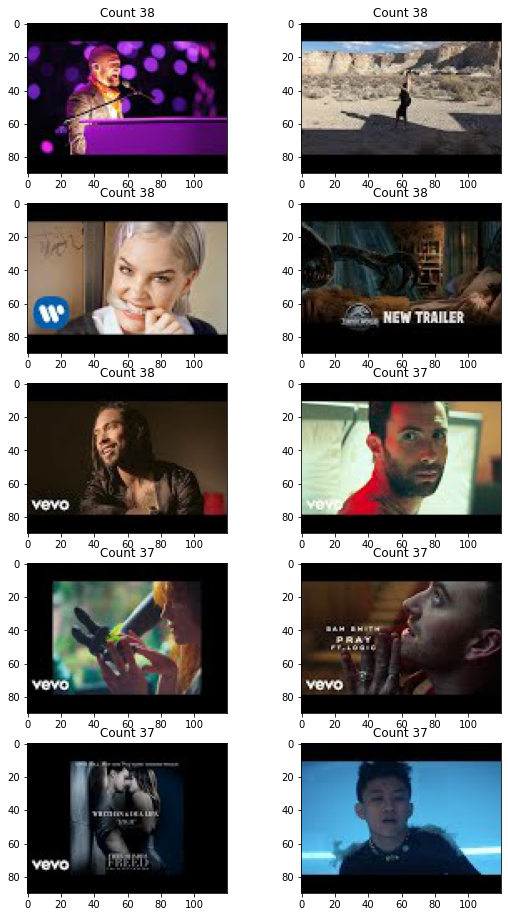

In [68]:
n_top = 10
columns = 2

gb_top = gb_images.nlargest(n_top, "count")

fig, axs = plt.subplots(n_top // columns, columns,figsize=(9,16)) # , gridspec_kw={'height_ratios': [1, 2]}
for i in range(n_top // 2):
    for j in range(columns):
        index = i * columns + j
        image_path = gb_top["thumbnail_path"].iloc[index][0]
        count = gb_top["count"].iloc[index]
        image = mpimg.imread(image_path)
        axs[i][j].title.set_text(f"Count {count}")
        axs[i][j].imshow(image)

**Stany Zjednoczone**

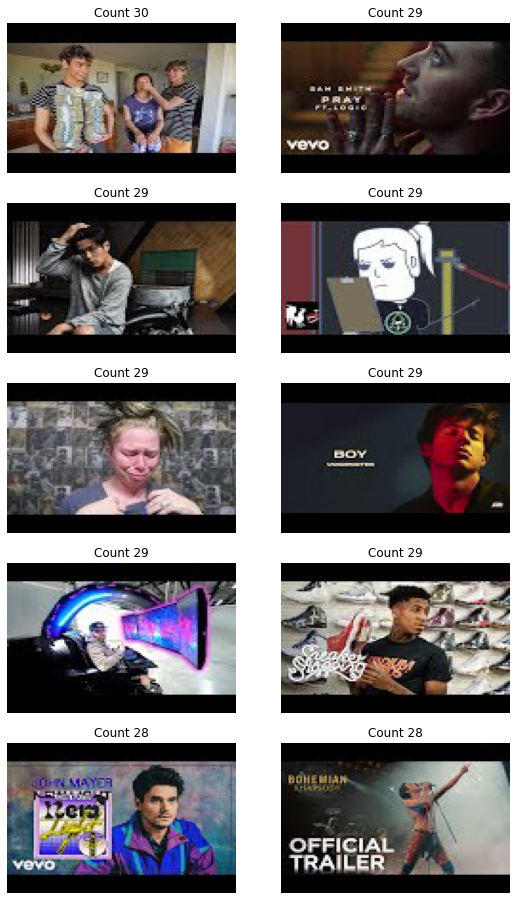

In [74]:
us_top = us_images.nlargest(n_top, "count")

fig, axs = plt.subplots(n_top // columns, columns,figsize=(9,16)) # , gridspec_kw={'height_ratios': [1, 2]}
for i in range(n_top // 2):
    for j in range(columns):
        index = i * columns + j
        image_path = us_top["thumbnail_path"].iloc[index][0]
        count = us_top["count"].iloc[index]
        image = mpimg.imread(image_path)
        axs[i][j].title.set_text(f"Count {count}")
        axs[i][j].axis('off')
        axs[i][j].imshow(image, aspect='auto')